In [3]:
from pytesseract import Output

import matplotlib.pyplot as plt
import pytesseract
import cv2
import numpy as np
import csv

In [4]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

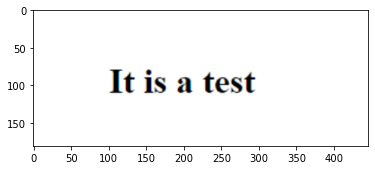

In [5]:
filename = 'wwwroot/assets/nb_example_02.png'
image = cv2.imread(filename)
results = pytesseract.image_to_data(image, output_type=Output.DICT)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
for i in range(0, len(results["text"])):
    x = results["left"][i]
    y = results["top"][i]
    w = results["width"][i]
    h = results["height"][i]

    text = results["text"][i]
    conf =  int(float(results["conf"][i]))

    if conf > 60:
        text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
        print(text, conf)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 200), 2)

It 94
is 94
a 96
test 95


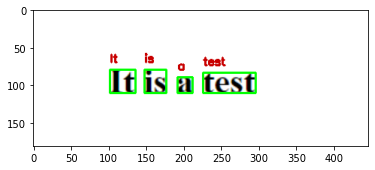

In [7]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.savefig('../results/docs_ocr_box.png', dpi=200)
plt.show()